In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as m
%matplotlib inline 

In [3]:
f = np.genfromtxt('playground_air.txt', usecols=(0,1))
e = np.genfromtxt('playground_sum.txt', usecols=(0,1))
k = np.genfromtxt('playground_spectemps.txt', usecols=(0,1))

freq1 = f[:,1]
temp1 = f[:,0]
freq2 = e[:,1]
temp2 = e[:,0]
freq1_norm = freq1 * float(8552./2731883.) # see full vs combined excel, total comb / total full

In [4]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):

    import numpy as np
    from math import factorial

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError, msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

        Combined	Full(blue)
 VALUES 8552	2731883
    MAX	60.727	71.337
    MIN	32.806	15.775
RANGE	27.920	55.562
AVERAGE	45.263	48.801
STD DEV	5.876	6.891
MEDIAN	44.254	49.838
SKEWNESS0.515	-0.451


In [8]:
specs = k[:,0]
zeros = specs*0 +3
print specs
print zeros

[ 63.9  55.   57.2  46.7  71.7  53.7  57.8  59.4  62.8  60.   60.   51.7
  87.2  42.2  49.5  56.   38.1  39.2  52.2  52.3  62.2  55.   43.9  51.1
  68.3  48.9  46.7  50.   63.9]
[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]


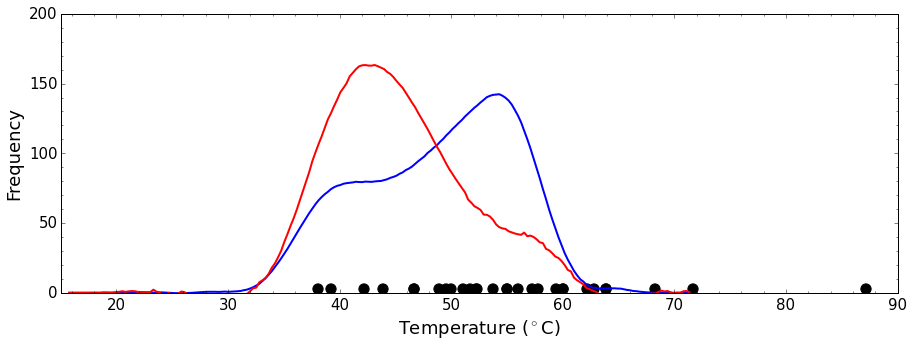

In [10]:
from scipy.interpolate import interp1d

fig = plt.gcf()
plt.figure(figsize=[15,5])
#plt.title('Power Ranch Temperature Frequency',fontsize=20)
plt.xlabel('Temperature ($^\circ$C)',fontsize=18)
plt.xlim([15,90])
plt.ylim([np.min(freq2),200])
plt.xticks(fontsize=15)
plt.ylabel('Frequency',fontsize=18)
plt.yticks(fontsize=15)
plt.minorticks_on()

#http://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter

yhat1 = savitzky_golay(freq1_norm, 51, 4) # window size 51, polynomial order 4
yhat2 = savitzky_golay(freq2, 101, 4) # window size 101, polynomial order 4

#plt.plot(temp1,freq1_norm,c='b')
#plt.plot(temp2,freq2,c='r')

plt.plot(temp1,yhat1, linewidth=2, c='b', label = 'neighborhood')
plt.plot(temp2,yhat2, linewidth=2, c='r', label = 'playground')

plt.scatter(specs, zeros, s=105, marker = 'o', color="black")
'''
plt.scatter(specs[4], 3, s = 105, c='green', marker='o', label = 'green slide')
plt.scatter(62.8, 3, s = 105, c='khaki', marker='o', label = 'sand')
plt.scatter(87.2, 3, s = 105, c='dimgrey', marker='o', label = 'rubber soft ground sufrace')
plt.scatter(68.3, 3, s = 105, c='brown', marker='o', label = 'boardwalk railing')
plt.scatter(57.2, 3, s = 105, c='r', marker='o', label = 'red bouncy rider seat')
plt.scatter(39.2, 3, s = 105, c='greenyellow', marker='o', label = 'grass')
plt.scatter(51.1, 3, s = 105, c='orchid', marker='o', label = 'purple structure posts')
plt.legend()
'''

plt.show()
